Here we will create our model and try to train it

---

As a pre-trained model Xception was chosen

## Data Manipulation

### Data Preparation

As the idea of the project is to detect whether the mushroom is edible or not, poisonous and inedible mushrooms will be labeled as inedible together.

In [ ]:
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Edible'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Inedible'

In [ ]:
import os
from shutil import copy

target_dir = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data'
dir = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)'

ed = '/Edible'
ined = '/Inedible'

for folder_name in os.listdir(dir + ed):
    for image in os.listdir(dir + ed + '/' + folder_name):
        copy(dir + ed + '/' + folder_name + '/' + image,
             target_dir + ed)
        
for folder_name in os.listdir(dir + ined):
    for image in os.listdir(dir + ined + '/' + folder_name):
        copy(dir + ined + '/' + folder_name + '/' + image,
             target_dir + ined)

In [ ]:
target_dir = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data'
dir = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)'

ined = '/Inedible'
pois = '/Poisonous'

for folder_name in os.listdir(dir + pois):
    for image in os.listdir(dir + pois + '/' + folder_name):
        copy(dir + pois + '/' + folder_name + '/' + image,
             target_dir + ined)

In [ ]:
import os

print('Total number of pictures of edible mushrooms:', len(os.listdir(
    '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Edible')))

print('Total number of pictures of inedible mushrooms:', len(os.listdir(
    '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Inedible')))

Total number of pictures of edible mushrooms: 1479
Total number of pictures of inedible mushrooms: 2705


### Here we will split our data into train, validation and test

**Train:** 750 edible, 1500 inedible


---


**Validation:** 400 edible, 800 inedible


---


**Test:** 329 edible, 405 inedible

In [ ]:
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/train'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/train/edible'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/train/inedible'

! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/validation'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/validation/edible'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/validation/inedible'

! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/test'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/test/edible'
! mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/test/inedible'

In [ ]:
import os, shutil

original_dataset_dir_ed = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Edible'
original_dataset_dir_ined = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Inedible'
base_dir = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_ed_dir = os.path.join(train_dir, 'edible')
train_ined_dir = os.path.join(train_dir, 'inedible')
validation_ed_dir = os.path.join(validation_dir, 'edible')
validation_ined_dir = os.path.join(validation_dir, 'inedible')
test_ed_dir = os.path.join(test_dir, 'edible')
test_ined_dir = os.path.join(test_dir, 'inedible')

First we **shuffle** the data and only then distribute it into folders

In [ ]:
import numpy as np

images_list = os.listdir(original_dataset_dir_ed)
images_shuffled = np.random.permutation(images_list)

for i in range(750):
    img_name = images_shuffled[i]
    shutil.copy(original_dataset_dir_ed + '/' + img_name,
                train_ed_dir)
    
for i in range(400):
    img_name = images_shuffled[i]
    shutil.copy(original_dataset_dir_ed + '/' + img_name,
                validation_ed_dir)
    
for i in range(329):
    img_name = images_shuffled[i]
    shutil.copy(original_dataset_dir_ed + '/' + img_name,
                test_ed_dir)

In [ ]:
images_list = os.listdir(original_dataset_dir_ined)
images_shuffled = np.random.permutation(images_list)

for i in range(1500):
    img_name = images_shuffled[i]
    shutil.copy(original_dataset_dir_ined + '/' + img_name,
                train_ined_dir)
    
for i in range(800):
    img_name = images_shuffled[i]
    shutil.copy(original_dataset_dir_ined + '/' + img_name,
                validation_ined_dir)
    
for i in range(405):
    img_name = images_shuffled[i]
    shutil.copy(original_dataset_dir_ined + '/' + img_name,
                test_ined_dir)

In [ ]:
print('total training edible mushrooms images:', len(os.listdir(train_ed_dir)))
print('total training inedible mushrooms images:', len(os.listdir(train_ined_dir)))
print('total validation edible mushrooms images:', len(os.listdir(validation_ed_dir)))
print('total validation inedible mushrooms images:', len(os.listdir(validation_ined_dir)))
print('total test edible mushrooms images:', len(os.listdir(test_ed_dir)))
print('total test inedible mushrooms images:', len(os.listdir(test_ined_dir)))

total training edible mushrooms images: 750
total training inedible mushrooms images: 1500
total validation edible mushrooms images: 400
total validation inedible mushrooms images: 800
total test edible mushrooms images: 329
total test inedible mushrooms images: 405


### Data Generation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2250 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


## Complete each time before main model

**TODO:** Add some more Data Augmentation

In [ ]:
import os, shutil

original_dataset_dir_ed = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Edible'
original_dataset_dir_ined = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data/Inedible'
base_dir = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/Prepared Data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_ed_dir = os.path.join(train_dir, 'edible')
train_ined_dir = os.path.join(train_dir, 'inedible')
validation_ed_dir = os.path.join(validation_dir, 'edible')
validation_ined_dir = os.path.join(validation_dir, 'inedible')
test_ed_dir = os.path.join(test_dir, 'edible')
test_ined_dir = os.path.join(test_dir, 'inedible')

In [ ]:
print('total training edible mushrooms images:', len(os.listdir(train_ed_dir)))
print('total training inedible mushrooms images:', len(os.listdir(train_ined_dir)))
print('total validation edible mushrooms images:', len(os.listdir(validation_ed_dir)))
print('total validation inedible mushrooms images:', len(os.listdir(validation_ined_dir)))
print('total test edible mushrooms images:', len(os.listdir(test_ed_dir)))
print('total test inedible mushrooms images:', len(os.listdir(test_ined_dir)))

total training edible mushrooms images: 750
total training inedible mushrooms images: 1500
total validation edible mushrooms images: 400
total validation inedible mushrooms images: 800
total test edible mushrooms images: 329
total test inedible mushrooms images: 405


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2250 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


## Main Model

### Xception | Very first simple model (30 epochs, without callbacks)

In [ ]:
from keras.applications.xception import Xception

In [ ]:
conv_base = Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(150, 150, 3))

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               6553728   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 27,415,337
Trainable params: 6,553,857
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights', 
      'before freezing the conv base',
      len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights', 
      'after freezing the conv base',
      len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base 158
This is the number of trainable weights after freezing the conv base 4


In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 37s 340ms/step - loss: 3.8104 - acc: 0.5970 - val_loss: 2.5040 - val_acc: 0.6660
Epoch 2/30
100/100 [==============================] - 33s 334ms/step - loss: 1.4399 - acc: 0.6525 - val_loss: 1.0398 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 34s 337ms/step - loss: 0.9731 - acc: 0.6804 - val_loss: 0.7895 - val_acc: 0.7190
Epoch 4/30
100/100 [==============================] - 33s 326ms/step - loss: 0.8887 - acc: 0.6739 - val_loss: 0.5259 - val_acc: 0.7310
Epoch 5/30
100/100 [==============================] - 33s 326ms/step - loss: 0.6395 - acc: 0.6774 - val_loss: 0.5198 - val_acc: 0.7090
Epoch 6/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6111 - acc: 0.7040 - val_loss: 0.5081 - val_acc: 0.7150
Epoch 7/30
100/100 [==============================] - 32s 324ms/step - loss: 0.6296 - acc: 0.7186 - val_loss: 0.5166 - val_acc: 0.7370
Epoch 8/30
100/100 [==============================] - 3

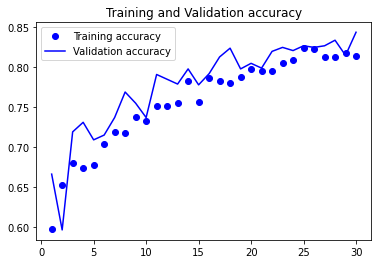

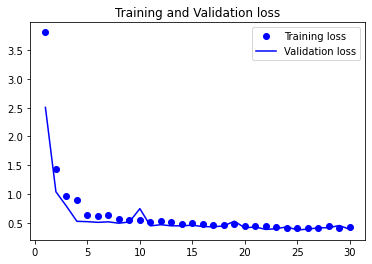

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Xception | Second model with callbacks

In [ ]:
from keras.applications.xception import Xception
conv_base = Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(150, 150, 3))

83697664/83683744 [==============================] - 2s 0us/step


In [ ]:
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6553728   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 27,415,337
Trainable params: 27,360,809
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights', 
      'before freezing the conv base',
      len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights', 
      'after freezing the conv base',
      len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base 158
This is the number of trainable weights after freezing the conv base 4


In [ ]:
!mkdir '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/model weights/'

In [ ]:
path = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/model weights/first_weights.hdf5'

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(filepath=path,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

model_early_stop_callback = EarlyStopping(monitor="val_loss",
                                          patience=20,
                                          verbose=1,
                                          mode="min")

In [ ]:
EPOCHS = 100
STEPS_TRAIN = 100
STEPS_VAL = 50

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=STEPS_TRAIN,
                    epochs=EPOCHS,
                    callbacks=[model_checkpoint_callback,
                               model_early_stop_callback],
                    validation_data=validation_generator,
                    validation_steps=STEPS_VAL)

Epoch 1/100
100/100 [==============================] - 38s 348ms/step - loss: 0.4562 - accuracy: 0.7920 - val_loss: 0.4141 - val_accuracy: 0.8130
Epoch 2/100
100/100 [==============================] - 35s 350ms/step - loss: 0.4228 - accuracy: 0.8075 - val_loss: 0.3829 - val_accuracy: 0.8270
Epoch 3/100
100/100 [==============================] - 34s 341ms/step - loss: 0.4123 - accuracy: 0.8020 - val_loss: 0.3962 - val_accuracy: 0.8030
Epoch 4/100
100/100 [==============================] - 33s 334ms/step - loss: 0.4183 - accuracy: 0.8151 - val_loss: 0.3549 - val_accuracy: 0.8410
Epoch 5/100
100/100 [==============================] - 34s 343ms/step - loss: 0.4106 - accuracy: 0.8131 - val_loss: 0.3868 - val_accuracy: 0.8260
Epoch 6/100
100/100 [==============================] - 34s 337ms/step - loss: 0.4037 - accuracy: 0.8166 - val_loss: 0.3791 - val_accuracy: 0.8160
Epoch 7/100
100/100 [==============================] - 34s 343ms/step - loss: 0.4120 - accuracy: 0.8111 - val_loss: 0.3607 -

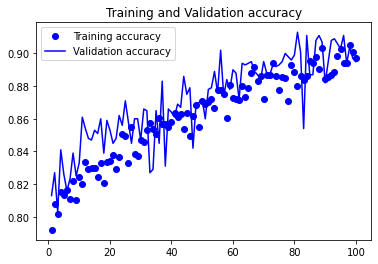

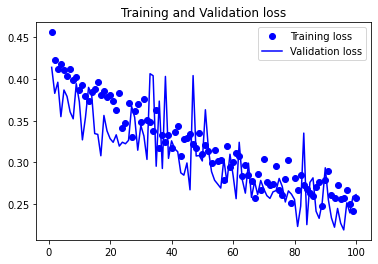

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## ResNetV2 | Trying smth new

In [ ]:
import keras.applications.resnet_v2 as A
dir(A)

['DOC',
 'ResNet101V2',
 'ResNet152V2',
 'ResNet50V2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'decode_predictions',
 'imagenet_utils',
 'keras_export',
 'preprocess_input',
 'resnet']

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
conv_base = ResNet50V2(weights='imagenet', 
                       include_top=False, 
                       input_shape=(150, 150, 3))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 5, 5, 2048)        23564800  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6553728   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 30,118,657
Trainable params: 30,073,217
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights', 
      'before freezing the conv base',
      len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights', 
      'after freezing the conv base',
      len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base 176
This is the number of trainable weights after freezing the conv base 4


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

new_weights = 'model weights/second_weights_ResNetV2.hdf5'
path = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)/' + \
        new_weights

model_checkpoint_callback = ModelCheckpoint(filepath=path,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

model_early_stop_callback = EarlyStopping(monitor="val_loss",
                                          patience=20,
                                          verbose=1,
                                          mode="min")

In [ ]:
EPOCHS = 500
STEPS_TRAIN = 100
STEPS_VAL = 50

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=STEPS_TRAIN,
                    epochs=EPOCHS,
                    callbacks=[model_checkpoint_callback,
                               model_early_stop_callback],
                    validation_data=validation_generator,
                    validation_steps=STEPS_VAL)

Epoch 1/500
100/100 [==============================] - 679s 7s/step - loss: 2.6786 - accuracy: 0.6447 - val_loss: 0.5673 - val_accuracy: 0.6850
Epoch 2/500
100/100 [==============================] - 102s 1s/step - loss: 0.6578 - accuracy: 0.6663 - val_loss: 0.5740 - val_accuracy: 0.6940
Epoch 3/500
100/100 [==============================] - 44s 442ms/step - loss: 0.6645 - accuracy: 0.6729 - val_loss: 0.5489 - val_accuracy: 0.7190
Epoch 4/500
100/100 [==============================] - 36s 361ms/step - loss: 0.6413 - accuracy: 0.6910 - val_loss: 0.5970 - val_accuracy: 0.7310
Epoch 5/500
100/100 [==============================] - 36s 356ms/step - loss: 0.6023 - accuracy: 0.7025 - val_loss: 0.5247 - val_accuracy: 0.7250
Epoch 6/500
100/100 [==============================] - 35s 346ms/step - loss: 0.5683 - accuracy: 0.7116 - val_loss: 0.5185 - val_accuracy: 0.7610
Epoch 7/500
100/100 [==============================] - 35s 351ms/step - loss: 0.5675 - accuracy: 0.7291 - val_loss: 0.4993 - val

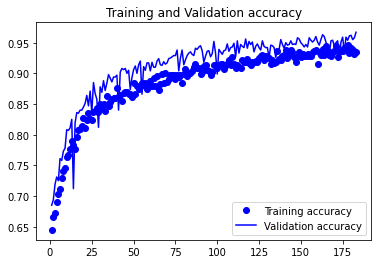

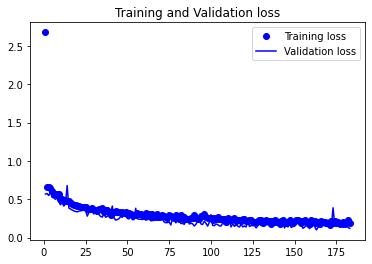

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

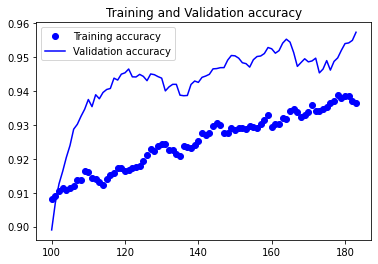

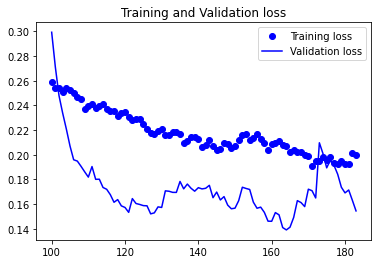

In [ ]:
epochs = range(100, len(acc) + 1)
plt.plot(epochs, smooth_curve(acc[99:]), 'bo', label='Training accuracy')
plt.plot(epochs, smooth_curve(val_acc[99:]), 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss[99:]), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss[99:]), 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## Model Evaluation

In [ ]:
weights_path = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)'
os.listdir(weights_path + '/model weights')

['first_weights.hdf5', 'second_weights_ResNetV2.hdf5']

Here we are loading our weights into model

In [ ]:
weights = new_weights
weights_path = '/content/drive/MyDrive/Mushrooms Binary Classification (edible & not)'
model.load_weights(weights_path + '/' + weights)

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='binary')

n_files = len(test_generator.filenames)
y_pred = model.predict_generator(test_generator, steps=n_files)
y_true = test_generator.classes

Found 734 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = np.rint(y_pred.flatten())
print(classification_report(y_true, y_pred, target_names=['Edible', 'Inedible']))

              precision    recall  f1-score   support

      Edible       0.97      0.94      0.96       329
    Inedible       0.95      0.98      0.96       405

    accuracy                           0.96       734
   macro avg       0.96      0.96      0.96       734
weighted avg       0.96      0.96      0.96       734

